

---




# Question 1. Load a color image.

 Convert it into grayscale.

 Resize it into different dimensions (eg. 128 * 128 and 64 * 64).

 Display it into subplots

 ---

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = tf.keras.utils.load_img("Lenna.jpeg")

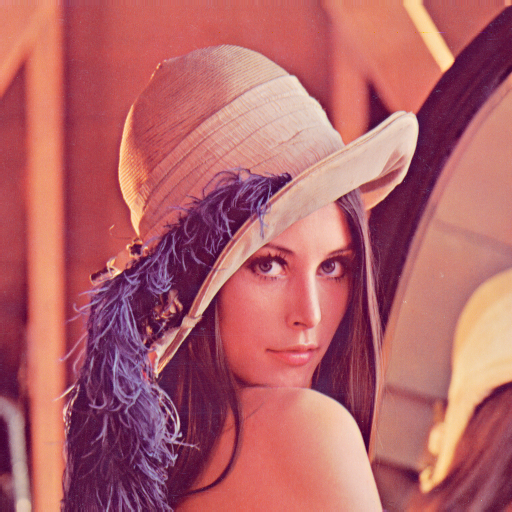

In [4]:
img

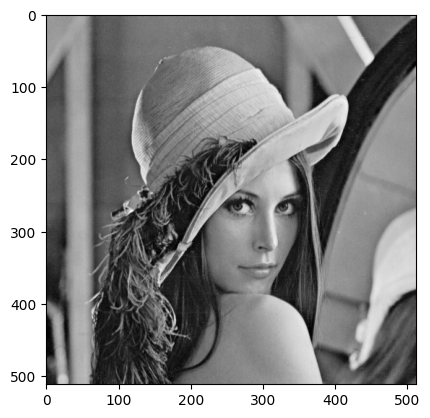

In [5]:
img_gray = tf.image.rgb_to_grayscale(img)
plt.imshow(img_gray,cmap="gray")


In [6]:
img_array = tf.keras.utils.img_to_array(img_gray)

In [7]:
img128 = tf.image.resize(img_array, [128, 128])
img64 = tf.image.resize(img_array,[64,64])

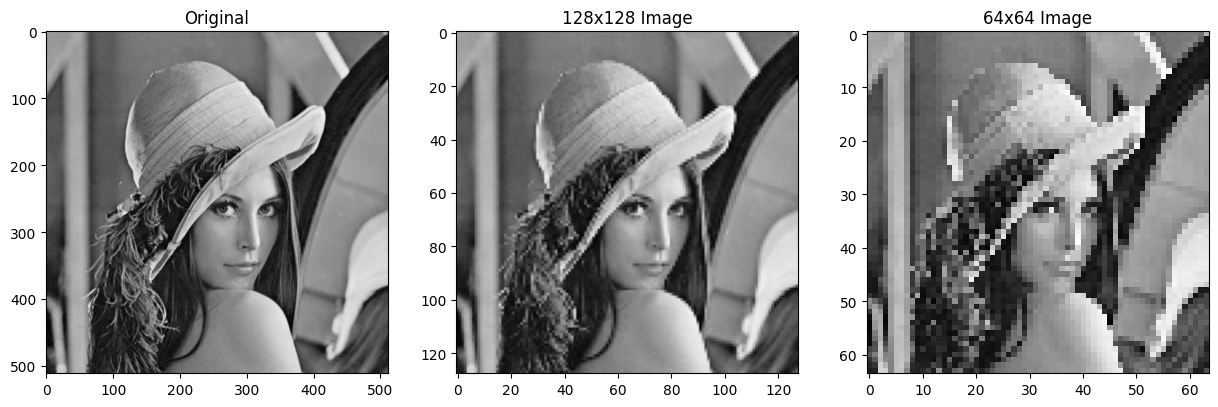

In [8]:
fig, axs = plt.subplots(1,3, figsize=(15,15))
axs[0].imshow(img_array,cmap='gray')
axs[0].title.set_text('Original')
axs[1].imshow(img128, cmap='gray')
axs[1].title.set_text('128x128 Image')
axs[2].imshow(img64, cmap='gray')
axs[2].title.set_text('64x64 Image')
plt.show()



---


##Question 2. Create an image puzzle

i. Load the image you want to use and convert it to a NumPy array

ii. Divide the image into blocks of equal size. The size of the blocks will depend on how big you want your puzzle pieces to be.

iii. Shuffle the order of the blocks to create a puzzle. You can do this by randomly permuting the indices of the blocks.

iv. Display the shuffled blocks as a puzzle by stitching them back together in their shuffled order.

v. To reconstruct the original image, unshuffle the blocks by applying the inverse permutation to the shuffled blocks and stitching them back together in their original order.

vi. Store the permuted and reconstructed image.

---

In [ ]:
img_raw = tf.keras.utils.load_img('lena.jpeg')

img_arr = np.array(img_raw)

In [ ]:
img_arr.shape[0]//10 # block size according to size of image

33

In [ ]:
def divide_into_blocks(image_array, block_size):
    height, width, _ = image_array.shape
    blocks = []
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = image_array[i:i+block_size, j:j+block_size]
            blocks.append(block)
    return blocks

blocks = divide_into_blocks(img_arr, 33)


In [ ]:
original_indices = list(range(len(blocks)))
np.random.shuffle(original_indices)
shuffled_blocks = [blocks[i] for i in original_indices]


In [ ]:
def stitch_blocks(blocks, original_shape, block_size):
    height, width, _ = original_shape
    num_blocks_height = height // block_size
    num_blocks_width = width // block_size
    shuffled_image = np.zeros(original_shape, dtype=np.uint8)
    index = 0
    for i in range(num_blocks_height):
        for j in range(num_blocks_width):
            shuffled_image[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = blocks[index]
            index += 1
    return shuffled_image


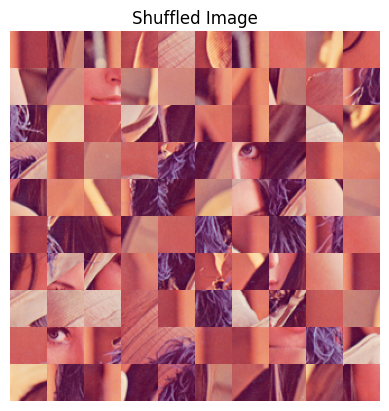

In [ ]:
shuffled_image = stitch_blocks(shuffled_blocks, img_arr.shape, 33)

plt.imshow(shuffled_image.astype(np.uint8))
plt.title('Shuffled Image')
plt.axis('off')
plt.show()

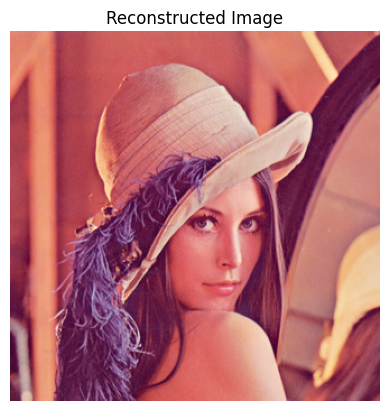

In [ ]:
inverse_indices = np.argsort(original_indices)
reconstructed_blocks = [shuffled_blocks[i] for i in inverse_indices]

reconstructed_image = stitch_blocks(reconstructed_blocks, img_arr.shape, 33)

plt.imshow(reconstructed_image.astype(np.uint8))
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


In [ ]:
tf.keras.preprocessing.image.save_img('shuffled_image.jpg', tf.convert_to_tensor(shuffled_image))

tf.keras.preprocessing.image.save_img('reconstructed_image.jpg', tf.convert_to_tensor(reconstructed_image))
